In [1]:
from thinkorswim import *
import matplotlib
import seaborn as sns
sns.set_context(font_scale=2.5)  
sns.set_style("ticks")
%matplotlib inline


In [2]:
import urllib.request
import datetime as dt
import pandas as pd

def get_google_data(symbol, period, window, exch = 'NYSE'):
    url_root = ('http://www.google.com/finance/getprices?i='
                + str(period) + '&p=' + str(window)
                + 'd&f=d,o,h,l,c,v&df=cpct&q=' + symbol.upper())
    response = urllib.request.urlopen(url_root)
    data=response.read().decode().split('\n')       #decode() required for Python 3
    data = [data[i].split(',') for i in range(len(data)-1)]
    header = data[0:7]
    data = data[7:]
    header[4][0] = header[4][0][8:]                 #get rid of 'Columns:' for label row
    df=pd.DataFrame(data, columns=header[4])
    df = df.dropna()                                #to fix the inclusion of more timezone shifts in the .csv returned from the goog api
    df.index = range(len(df))                       #fix the index from the previous dropna()

    ind=pd.Series(len(df))
    for i in range(len(df)):
        if df['DATE'].ix[i][0] == 'a':
            anchor_time = dt.datetime.fromtimestamp(int(df['DATE'].ix[i][1:]))  #make datetime object out of 'a' prefixed unix timecode
            ind[i]=anchor_time
        else:
            ind[i] = anchor_time +dt.timedelta(seconds = (period * int(df['DATE'].ix[i])))
    df.index = ind

    df=df.drop('DATE', 1)

    for column in df.columns:                #shitty implementation because to_numeric is pd but does not accept df
        df[column]=pd.to_numeric(df[column])

    return df

In [3]:
data = get_google_data('SPY',60, 1)
data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


,CLOSE,HIGH,LOW,OPEN,VOLUME
2017-06-21 09:30:00,243.400,243.460,243.400,243.460,140831
2017-06-21 09:31:00,243.360,243.400,243.320,243.400,186953
2017-06-21 09:32:00,243.350,243.410,243.340,243.360,25220
2017-06-21 09:33:00,243.330,243.380,243.310,243.360,24537
2017-06-21 09:34:00,243.290,243.360,243.260,243.330,100476
2017-06-21 09:35:00,243.250,243.310,243.240,243.280,67440
2017-06-21 09:36:00,243.190,243.280,243.150,243.240,77237
2017-06-21 09:37:00,243.130,243.230,243.120,243.190,168670
2017-06-21 09:38:00,243.210,243.230,243.140,243.140,42256
2017-06-21 09:39:00,243.280,243.290,243.210,243.210,50044


# underlying

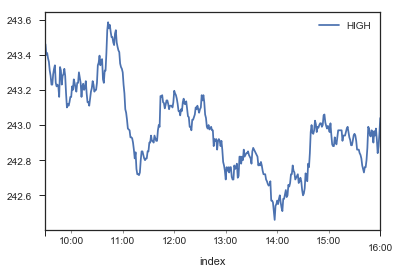

In [4]:
data.reset_index().plot(x=0,y=1)

# option

In [5]:
spy_tos = load_tos_datafile('../options/spy_20170621.txt')

(736501.3958333334, 736501.6666666666)

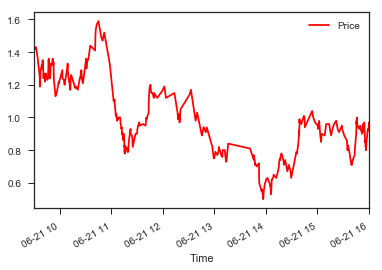

In [6]:
data = spy_tos.loc['2017-06-21',242,'C']
ax = data.reset_index().plot("Time",'Price',color='red')
ax.set_xlim('2017-06-21 9:30:00','2017-06-21 16:00:00')